In [1]:
import math
import pandas as pd
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

2023-05-21 12:03:40.794289: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 12:03:41.576710: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
df = pd.read_csv("Admission_Predict.csv")
df = df.drop("Serial No.",axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop("Chance of Admit ", axis=1)
Y = df["Chance of Admit "]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [5]:
sclaler = StandardScaler()

x_train = sclaler.fit_transform(X_train)
x_test = sclaler.fit_transform(X_test)

In [6]:
model = models.Sequential()
    
model.add(layers.Dense(1000, input_dim=7, activation='relu'))
    
    
model.add(layers.Dense(250, input_dim=7, activation='relu'))

model.add(layers.Dense(100, input_dim=7, activation='relu'))
    
    
model.add(layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

2023-05-21 12:03:43.300285: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-21 12:03:43.342623: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/30
107/107 [==============================] - 1s 4ms/step - loss: 0.0386 - mae: 0.1411
Epoch 2/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0128 - mae: 0.0883
Epoch 3/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0073 - mae: 0.0659
Epoch 4/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0064 - mae: 0.0632
Epoch 5/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0059 - mae: 0.0605
Epoch 6/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0052 - mae: 0.0579
Epoch 7/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0052 - mae: 0.0555
Epoch 8/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0067 - mae: 0.0640
Epoch 9/30
107/107 [==============================] - 0s 3ms/step - loss: 0.0035 - mae: 0.0456
Epoch 10/30
107/107 [==============================] - 0s 4ms/step - loss: 0.0040 - mae: 0.0490
Epoch 11/30
107/107 [============================

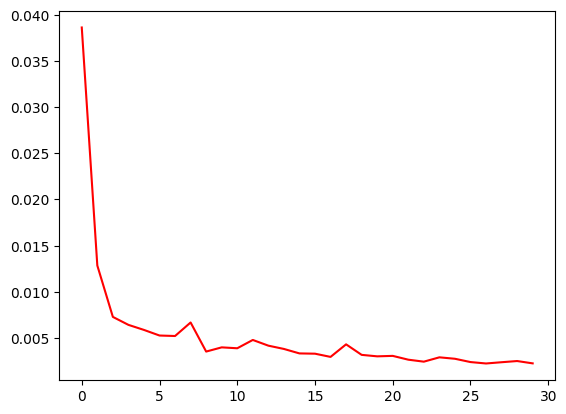

In [7]:
history = model.fit(x_train, y_train, epochs=30, batch_size=3)

train_acc = model.evaluate(x_train, y_train, batch_size=32)
test_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()